In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_csv('applications data.csv')

In [3]:
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [4]:
df.describe()

,record,date,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,2.016067e+07,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.016010e+07,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.016040e+07,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.016070e+07,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.016100e+07,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,2.016123e+07,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


date

In [5]:
df['date']=df['date'].astype(str)
date.describe()

NameError: name 'date' is not defined

month

In [6]:
df['month']=df['date'].str[4:6]
df

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,month
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0,01
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,01
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0,01
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,01
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,01
...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,12
999996,999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,12
999997,999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,12
999998,999999,20161231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,12


In [7]:
month=df['month'].astype(str)
df_month = pd.DataFrame(month.value_counts())
df_month=df_month.rename(columns={'month':'count'}).reset_index()
df_month=df_month.rename(columns={'index':'month'})
df_month['percentage']=df_month['count']/1000000
df_month.sort_values("month",inplace=True)


In [8]:
df_month

,month,count,percentage
0,01,85199,0.085199
11,02,76792,0.076792
4,03,84871,0.084871
7,04,82515,0.082515
1,05,85083,0.085083
9,06,82035,0.082035
2,07,84943,0.084943
6,08,84830,0.084830
8,09,82374,0.082374
5,10,84865,0.084865


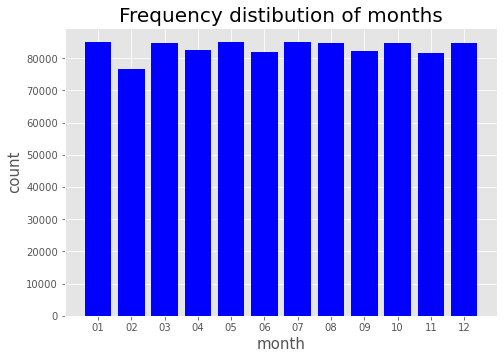

In [132]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_month['month'],df_month['count'],color='blue')
ax.set_xlabel('month',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of months',fontsize=20)
plt.show()

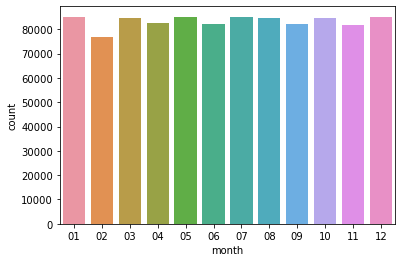

In [11]:
sns.barplot(data = df_month, 
            x = 'month', 
            y = 'count')

dates

In [10]:
df['dates']=df['date'].str[6:]
df

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,month,dates
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0,01,01
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,01,01
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0,01,01
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,01,01
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,12,31
999996,999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,12,31
999997,999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,12,31
999998,999999,20161231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,12,31


In [11]:
dates=df['dates'].astype(str)
df_dates = pd.DataFrame(dates.value_counts())
df_dates=df_dates.rename(columns={'dates':'count'}).reset_index()
df_dates=df_dates.rename(columns={'index':'dates'})
df_dates['percentage']=df_dates['count']/1000000
df_dates.sort_values("dates",inplace=True)

In [12]:
df_dates

,dates,count,percentage
19,01,32784,0.032784
5,02,33006,0.033006
7,03,32982,0.032982
3,04,33166,0.033166
13,05,32862,0.032862
10,06,32916,0.032916
15,07,32836,0.032836
0,08,33384,0.033384
20,09,32783,0.032783
27,10,32572,0.032572


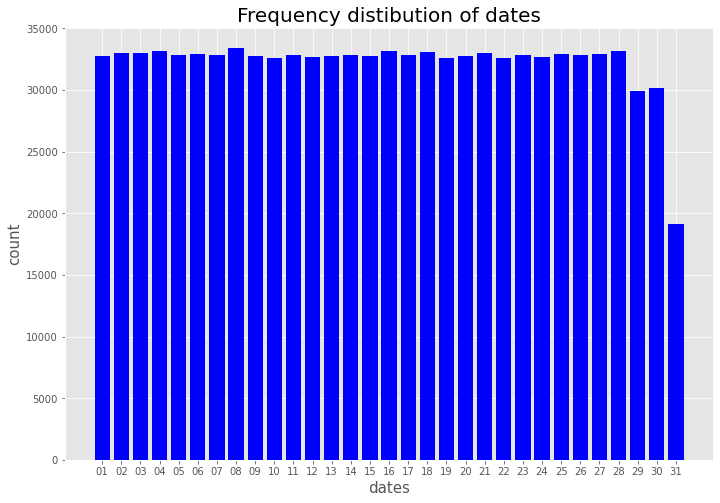

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(df_dates['dates'],df_dates['count'],color='blue')
ax.set_xlabel('dates',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of dates',fontsize=20)
plt.show()

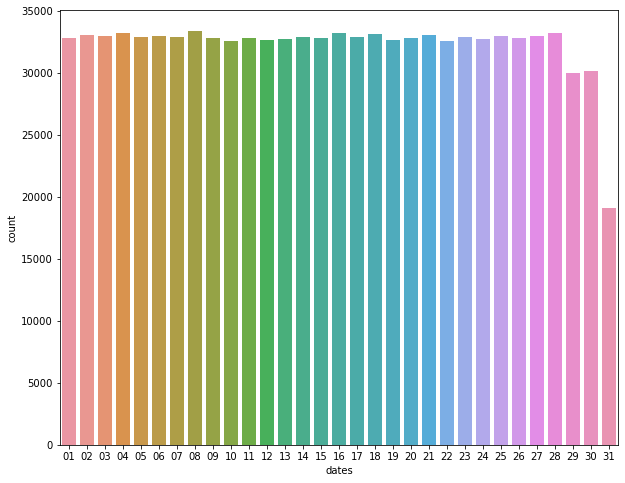

In [18]:

plt.figure(figsize=(10, 8))
sns.barplot(data = df_dates, 
            x = 'dates', 
            y = 'count')

plt.show()

SSN


In [19]:
missing_ssn=df[df['ssn'].isnull()]
len(missing_ssn)

0

In [20]:
unique_ssn=df['ssn'].unique()
len(unique_ssn)

835819

In [21]:
ssn=df['ssn'].astype(str)

In [22]:
 

df_ssn = pd.DataFrame(ssn.value_counts( ).head(11))
df_ssn=df_ssn.rename(columns={'ssn':'count'}).reset_index()
df_ssn=df_ssn.rename(columns={'index':'ssn'})
df_ssn['percentage']=df_ssn['count']/1000000
df_ssn

,ssn,count,percentage
0,999999999,16935,0.016935
1,938972725,114,0.000114
2,810776805,81,0.000081
3,829352390,74,0.000074
4,473311863,44,0.000044
5,165764866,34,0.000034
6,189622157,30,0.000030
7,295308935,30,0.000030
8,588726212,29,0.000029
9,163830210,29,0.000029


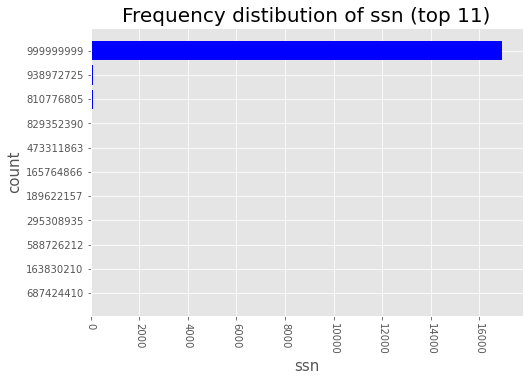

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_ssn['ssn'],df_ssn['count'],color='blue')
plt.xticks(rotation=270)
ax.set_xlabel('ssn',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of ssn (top 11)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

In [24]:
df_ssn_dele=df_ssn.iloc[1:,:]

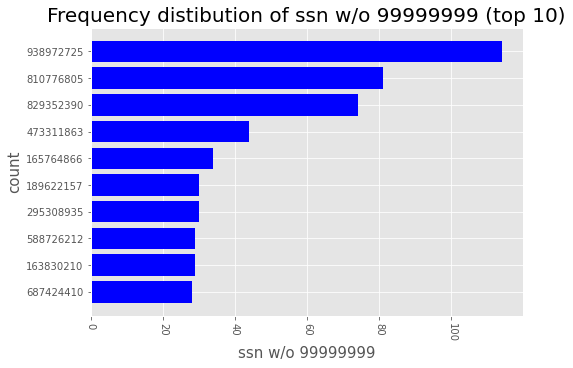

In [133]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_ssn_dele['ssn'],df_ssn_dele['count'],color='blue')
plt.xticks(rotation=270)
ax.set_xlabel('ssn w/o 99999999',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of ssn w/o 99999999 (top 10)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()


firstname

In [45]:
missing_firstname=df[df['firstname'].isnull()]
len(missing_firstname)

0

In [46]:
unique_firstname=df['firstname'].unique()
len(unique_firstname)

78136

In [47]:
firstname=df['firstname']
df_firstname = pd.DataFrame(firstname.value_counts( ).head(10))
df_firstname=df_firstname.rename(columns={'firstname':'count'}).reset_index()
df_firstname=df_firstname.rename(columns={'index':'firstname'})
df_firstname['percentage']=df_firstname['count']/1000000

In [48]:
df_firstname

,firstname,count,percentage
0,EAMSTRMT,12658,0.012658
1,TXEMXZZM,10297,0.010297
2,UXXJJZTUZ,10235,0.010235
3,UJSRSMUEZ,9994,0.009994
4,SREZUJMJU,9688,0.009688
5,EASEXMJAT,7576,0.007576
6,SSSXUEJMS,6923,0.006923
7,SZUASTTA,6878,0.006878
8,EREMTZXXA,6717,0.006717
9,EAXRRUMUX,5686,0.005686


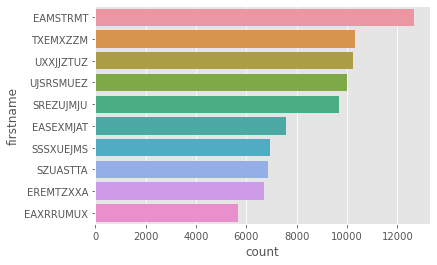

In [129]:

sns.barplot(data = df_firstname, 
            x = 'count', 
            y = 'firstname')

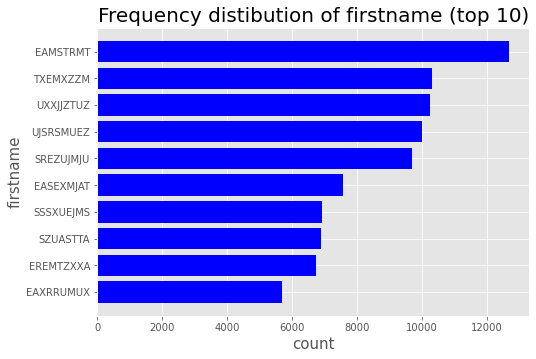

In [130]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_firstname['firstname'],df_firstname['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('firstname',fontsize=15)
ax.set_title('Frequency distibution of firstname (top 10)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

last name 

In [72]:
missing_lastname=df[df['lastname'].isnull()]
len(missing_lastname)

0

In [73]:
unique_lastname=df['lastname'].unique()
len(unique_lastname)

177001

In [74]:
lastname=df['lastname']
df_lastname = pd.DataFrame(lastname.value_counts( ).head(10))
df_lastname=df_lastname.rename(columns={'lastname':'count'}).reset_index()
df_lastname=df_lastname.rename(columns={'index':'lastname'})
df_lastname['percentage']=df_lastname['count']/1000000
df_lastname

,lastname,count,percentage
0,ERJSAXA,8580,0.008580
1,UMXUUUSE,7156,0.007156
2,UMARRMA,6832,0.006832
3,MEAXJUX,5492,0.005492
4,XMERRR,5451,0.005451
5,SXZXJRJT,4340,0.004340
6,EUSEZRAE,4173,0.004173
7,USMATTUR,4036,0.004036
8,ETERUXME,3762,0.003762
9,RJURSTXJ,3575,0.003575


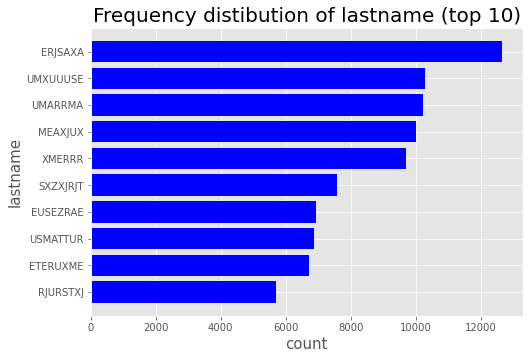

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_lastname['lastname'],df_firstname['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('lastname',fontsize=15)
ax.set_title('Frequency distibution of lastname (top 10)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

address

In [77]:
missing_address=df[df['address'].isnull()]
len(missing_address)

0

In [78]:
unique_address=df['address'].unique()
len(unique_address)

828774

In [83]:
address=df['address']
df_address = pd.DataFrame(address.value_counts( ).head(11))
df_address=df_address.rename(columns={'address':'count'}).reset_index()
df_address=df_address.rename(columns={'index':'address'})
df_address['percentage']=df_address['count']/1000000
df_address

,address,count,percentage
0,123 MAIN ST,1079,0.001079
1,1775 XJXE LN,97,0.000097
2,7433 RAEZA ST,80,0.000080
3,8911 MZSU DR,74,0.000074
4,4907 RRAAU DR,73,0.000073
5,426 XUAXZ BLVD,57,0.000057
6,606 EZZAU WY,44,0.000044
7,3545 ARMA ST,44,0.000044
8,4530 ETSMX WY,42,0.000042
9,4292 RUSMM LN,41,0.000041


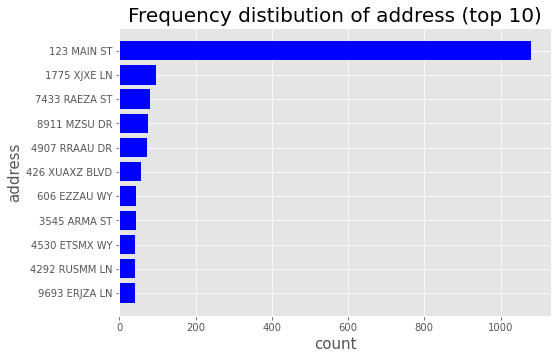

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_address['address'],df_address['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('address',fontsize=15)
ax.set_title('Frequency distibution of address (top 10)',fontsize=20)
plt.gca().invert_yaxis()

plt.show()

In [85]:
df_address_dele=df_address.iloc[1:,:]

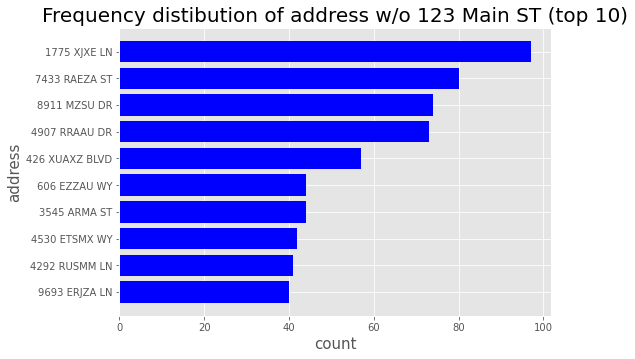

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_address_dele['address'],df_address_dele['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('address',fontsize=15)
ax.set_title('Frequency distibution of address w/o 123 Main ST (top 10)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

zip5

In [88]:
zip5=df['zip5'].astype(str)

In [89]:
zip5.describe()

count     1000000
unique      26370
top         68138
freq          823
Name: zip5, dtype: object

In [90]:
df_zip5 = pd.DataFrame(zip5.value_counts( ).head(10))
df_zip5=df_zip5.rename(columns={'zip5':'count'}).reset_index()
df_zip5=df_zip5.rename(columns={'index':'zip5'})
df_zip5['percentage']=df_zip5['count']/100000
df_zip5

,zip5,count,percentage
0,68138,823,0.00823
1,90042,514,0.00514
2,89835,489,0.00489
3,35227,478,0.00478
4,14931,459,0.00459
5,86500,438,0.00438
6,12700,436,0.00436
7,1362,434,0.00434
8,59695,432,0.00432
9,52317,432,0.00432


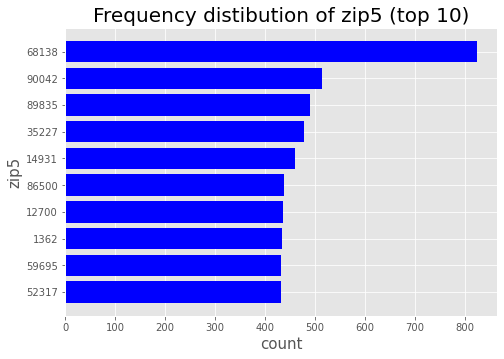

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_zip5['zip5'],df_zip5['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('zip5',fontsize=15)
ax.set_title('Frequency distibution of zip5 (top 10)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

dob

In [92]:
dob=df['dob'].astype(str)
dob.describe()

count      1000000
unique       42673
top       19070626
freq        126568
Name: dob, dtype: object

In [93]:
df_dob = pd.DataFrame(dob.value_counts( ).head(11))
df_dob=df_dob.rename(columns={'dob':'count'}).reset_index()
df_dob=df_dob.rename(columns={'index':'dob'})
df_dob['percentage']=df_dob['count']/1000000
df_dob

,dob,count,percentage
0,19070626,126568,0.126568
1,19640318,4818,0.004818
2,19760625,3723,0.003723
3,19880628,1404,0.001404
4,19740216,980,0.000980
5,20090127,280,0.000280
6,19460901,135,0.000135
7,19591208,126,0.000126
8,19280611,120,0.000120
9,19670215,102,0.000102


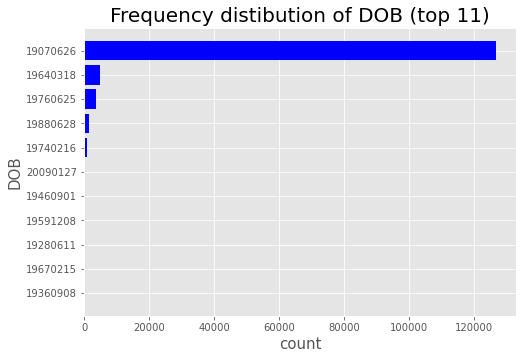

In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_dob['dob'],df_dob['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('DOB',fontsize=15)
ax.set_title('Frequency distibution of DOB (top 11)',fontsize=20)
plt.gca().invert_yaxis()

plt.show()

In [97]:
df_dob_dele=df_dob.iloc[1:,:]

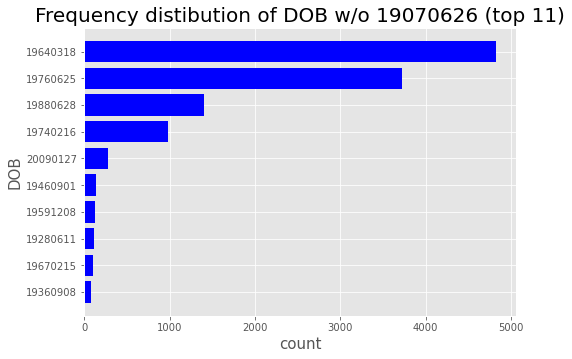

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_dob_dele['dob'],df_dob_dele['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('DOB',fontsize=15)
ax.set_title('Frequency distibution of DOB w/o 19070626 (top 11)',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

dob year

In [99]:
df['dob']=df['dob'].astype(str)
df['dob_year']=df['dob'].str[:4]
df

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,month,dates,dob_year
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0,01,01,1907
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,01,01,1934
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0,01,01,1907
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,01,01,1944
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,01,01,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,12,31,1955
999996,999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,12,31,1915
999997,999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,12,31,1988
999998,999999,20161231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,12,31,2012


In [100]:
dob_year=df['dob_year']
df_dob_year = pd.DataFrame(dob_year.value_counts( ).head(10))
df_dob_year=df_dob_year.rename(columns={'dob_year':'count'}).reset_index()
df_dob_year=df_dob_year.rename(columns={'index':'dob_year'})
df_dob_year['percentage']=df_dob_year['count']/1000000
df_dob_year

,dob_year,count,percentage
0,1907,133986,0.133986
1,1964,12254,0.012254
2,1976,11152,0.011152
3,1988,8664,0.008664
4,1974,8385,0.008385
5,2001,7677,0.007677
6,2009,7656,0.007656
7,1951,7623,0.007623
8,1908,7562,0.007562
9,1992,7542,0.007542


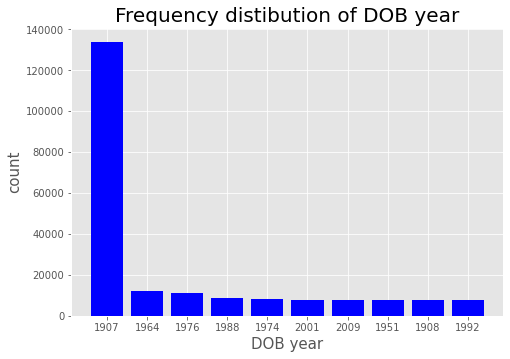

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_dob_year['dob_year'],df_dob_year['count'],color='blue')
ax.set_xlabel('DOB year',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of DOB year',fontsize=20)
plt.show()

dob month-year

In [111]:
df['dob_year_month']=df['dob'].str[:4]+'-'+df['dob'].str[4:6]

In [114]:
dob_year_month=df['dob_year_month']
df_dob_year_month = pd.DataFrame(dob_year_month.value_counts( ).head(10))
df_dob_year_month=df_dob_year_month.rename(columns={'dob_year_month':'count'}).reset_index()
df_dob_year_month=df_dob_year_month.rename(columns={'index':'dob_year_month'})
df_dob_year_month['percentage']=df_dob_year_month['count']/1000000
df_dob_year_month

,dob_year_month,count,percentage
0,1907-06,127165,0.127165
1,1964-03,5407,0.005407
2,1976-06,4324,0.004324
3,1988-06,1993,0.001993
4,1974-02,1508,0.001508
5,2009-01,906,0.000906
6,1959-12,775,0.000775
7,1951-07,735,0.000735
8,1946-09,716,0.000716
9,1977-07,712,0.000712


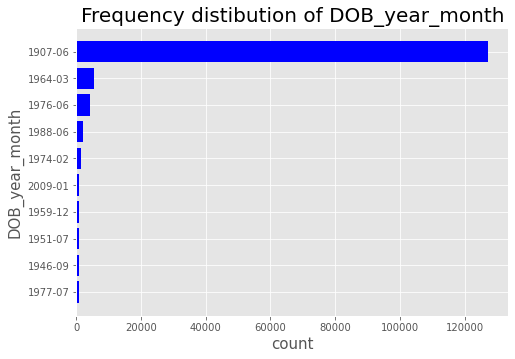

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_dob_year_month['dob_year_month'],df_dob_year_month['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('DOB_year_month',fontsize=15)
ax.set_title('Frequency distibution of DOB_year_month',fontsize=20)
plt.gca().invert_yaxis()

plt.show()

homephone

In [119]:
phone=df['homephone'].astype(str)
phone.describe()

count        1000000
unique         28244
top       9999999999
freq           78512
Name: homephone, dtype: object

In [120]:
df_phone = pd.DataFrame(phone.value_counts( ).head(11))
df_phone=df_phone.rename(columns={'homephone':'count'}).reset_index()
df_phone=df_phone.rename(columns={'index':'phone'})
df_phone['percentage']=df_phone['count']/1000000
df_phone

,phone,count,percentage
0,9999999999,78512,0.078512
1,6384782007,466,0.000466
2,6035129044,360,0.000360
3,2113738531,331,0.000331
4,4024680535,198,0.000198
5,2669445638,172,0.000172
6,6637507363,169,0.000169
7,8629049955,139,0.000139
8,3364980740,110,0.000110
9,1324008228,108,0.000108


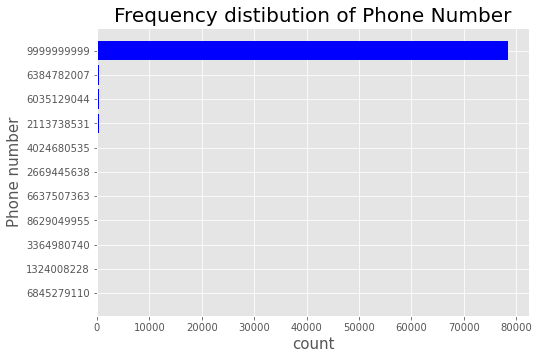

In [122]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_phone['phone'],df_phone['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('Phone number',fontsize=15)
ax.set_title('Frequency distibution of Phone Number',fontsize=20)
plt.gca().invert_yaxis()

plt.show()

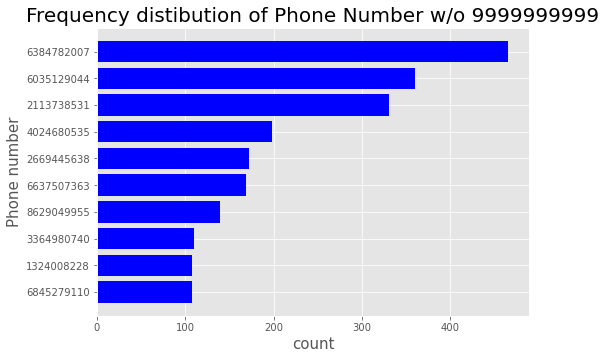

In [123]:
df_phone_dele=df_phone.iloc[1:,:]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(df_phone_dele['phone'],df_phone_dele['count'],color='blue')
ax.set_xlabel('count',fontsize=15)
ax.set_ylabel('Phone number',fontsize=15)
ax.set_title('Frequency distibution of Phone Number w/o 9999999999',fontsize=20)
plt.gca().invert_yaxis()
plt.show()

fraud_label

In [124]:
fraud=df['fraud_label'].astype(str)
fraud.describe()

count     1000000
unique          2
top             0
freq       985607
Name: fraud_label, dtype: object

In [125]:
df_fraud= pd.DataFrame(fraud.value_counts( ))
df_fraud=df_fraud.rename(columns={'fraud_label':'count'}).reset_index()
df_fraud=df_fraud.rename(columns={'index':'fraud'})
df_fraud['percentage']=df_fraud['count']/1000000


df_fraud

,fraud,count,percentage
0,0,985607,0.985607
1,1,14393,0.014393


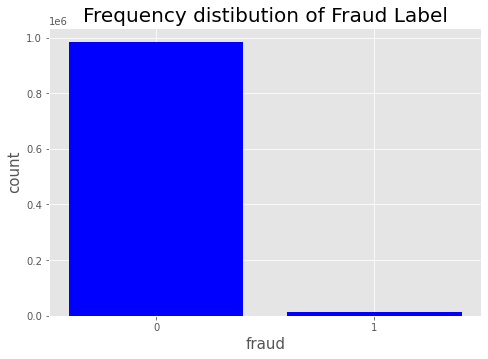

In [127]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_fraud['fraud'],df_fraud['count'],color='blue')
ax.set_xlabel('fraud',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title('Frequency distibution of Fraud Label',fontsize=20)
plt.show()